In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:20: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


In [2]:
%matplotlib inline

sns.set_style('darkgrid')

session_info.show()

## Importar funciones personalizadas

In [3]:
%run pandas-missing-extension.ipynb

## Operar con valores faltantes

### Python

In [4]:
print(
    None or True,
    None or False,
    None == None,
    # None + 1,
    type(None),
    sep='\t'
)

True	False	True	<class 'NoneType'>


### NumPy

In [5]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan + 1,
    type(np.nan),
    np.isnan(np.nan),
    sep='\t'
)

nan	False	True	nan	<class 'float'>	True


### Pandas

In [6]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x = [0, 1, np.nan, np.nan, None],
        y = [0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [7]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [8]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [9]:
test_missing_df.x.isna()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [10]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [11]:
pd.Series([pd.to_datetime('2020-01-01'), np.nan])


0   2020-01-01
1          NaT
dtype: datetime64[ns]

In [12]:
pd.Series([-1]).isna()

0    False
dtype: bool

## Cargando datos

### Prima Indians Diabetes Database

In [13]:
prima_indians_diabetes_url = 'https://nrvis.com/data/mldata/pima-indians-diabetes.csv'

In [14]:
!curl -o "./data/pima-indians-diabetes.csv" {prima_indians_diabetes_url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23279  100 23279    0     0  27398      0 --:--:-- --:--:-- --:--:-- 27419


In [15]:
diabetes_df = pd.read_csv(
    './data/pima-indians-diabetes.csv',
    names=[
        'pregnancies',
        'glucose',
        'blood_pressure',
        'skin_thickness',
        'insulin',
        'bmi',
        'diabetes_pedigree_function',
        'age',
        'outcome'
    ]
)

diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [16]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar conjuntos de datos

In [17]:
oceanbuoys_df = pyreadr.read_r(f'./data/{datasets_names[0]}{extension}')[datasets_names[0]]
pedestrian_df = pyreadr.read_r(f'./data/{datasets_names[1]}{extension}')[datasets_names[1]]
riskfactors_df = pyreadr.read_r(f'./data/{datasets_names[2]}{extension}')[datasets_names[2]]

#### Verificar carga

In [18]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [19]:
riskfactors_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

# Tabulacion de datos faltantes

In [20]:
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [21]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## Resumenes de valores faltantes

In [22]:
riskfactors_df.shape, riskfactors_df.size

((245, 34), 8330)

### Numero total de valores completos (sin observaciones faltantes)

In [23]:
riskfactors_df.notna().sum().sum()

7144

### Numero total de valores faltantes

In [24]:
riskfactors_df.isna().sum().sum()

1186

## Resumenes tabulares de valores faltantes

### Variables / Columnas

#### Resumen por variable

In [25]:
# riskfactors_df.missing.missing_variable_summary()

(
    riskfactors_df
    .isna()
    .pipe(
        lambda df: (
            df.sum()
            .reset_index(name='missing_count')
            .rename(columns={'index': 'variable'})
            .assign(
                n_cases = len(df),
                pct_missing = lambda df: df.missing_count / df.n_cases * 100 # pct missing es el porcentaje de valores faltantes por variable
            )
        )
    )
)

,variable,missing_count,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


##### Tabulacion del resumen por variable

In [26]:
riskfactors_df.missing.missing_variable_table()

# (
#     riskfactors_df.missing.missing_variable_summary()
#     .value_counts("n_missing")
#     .reset_index()
#     .rename(columns={"n_missing": "n_missing_in_variable", 0: "n_variables"})
#     .assign(
#         pct_variables=lambda df: df.n_variables / df.n_variables.sum() * 100
#     )
#     .sort_values("pct_variables", ascending=False)
# )


,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


### Casos / Observaciones / Filas

#### Resumen por caso

In [27]:
riskfactors_df.shape

(245, 34)

In [28]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


##### Tabulacion del resumen por caso

In [29]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


## Intervalos de Valores Faltantes

In [30]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable='weight_lbs',
        span_every=50,
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


## run length de valores faltantes

In [31]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable='weight_lbs',
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


# Visualizacion inicial de valores faltantes

## Variable

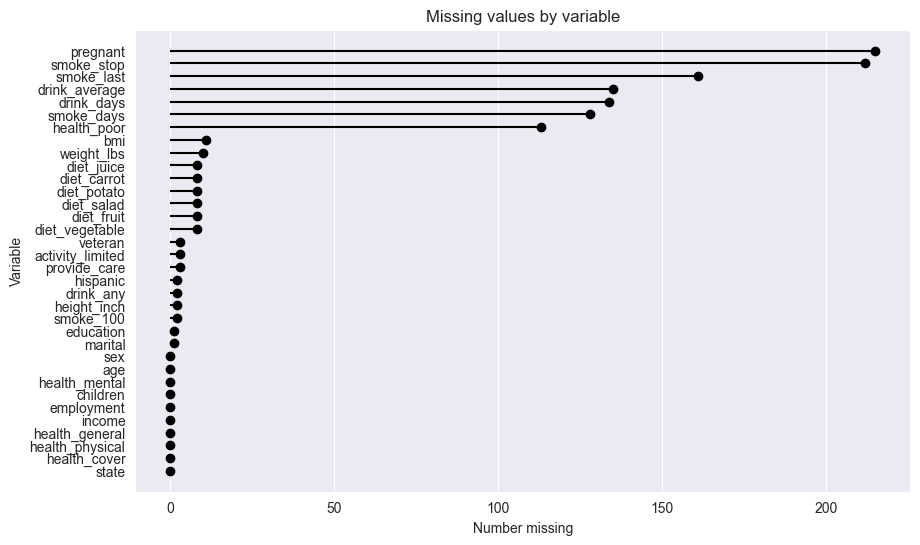

In [32]:
plt.figure(figsize=(10, 6))
riskfactors_df.missing.missing_variable_plot()

plt.title('Missing values by variable')

plt.show()

## Casos / Observaciones / Filas

In [33]:
riskfactors_df.shape

(245, 34)

AttributeError: Rectangle.set() got an unexpected keyword argument 'whidth'

<Figure size 1000x600 with 0 Axes>

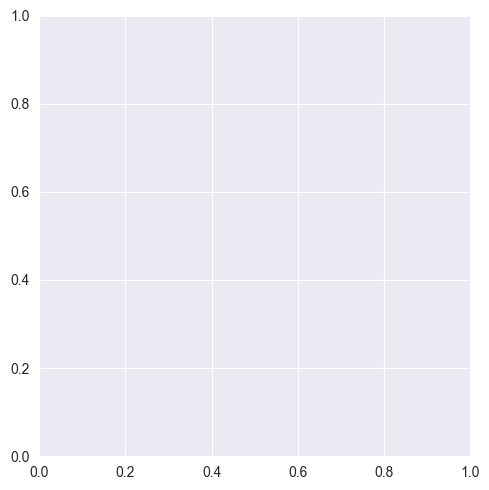

In [34]:
plt.figure(figsize=(10, 6))

riskfactors_df.missing.missing_case_plot()

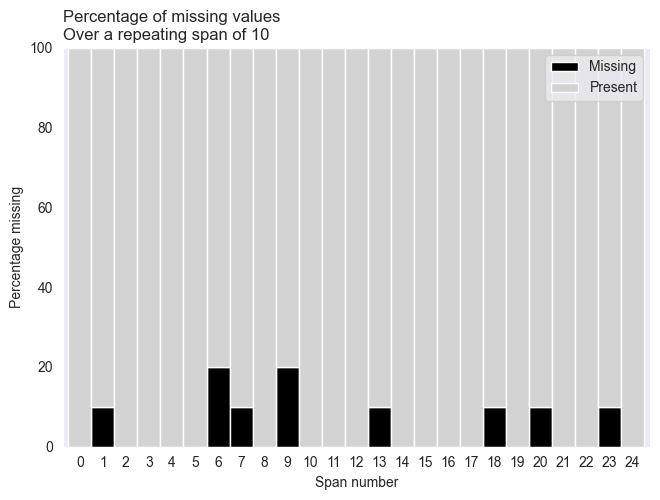

In [ ]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs',
        span_every=10,
    )
)

<AxesSubplot: >

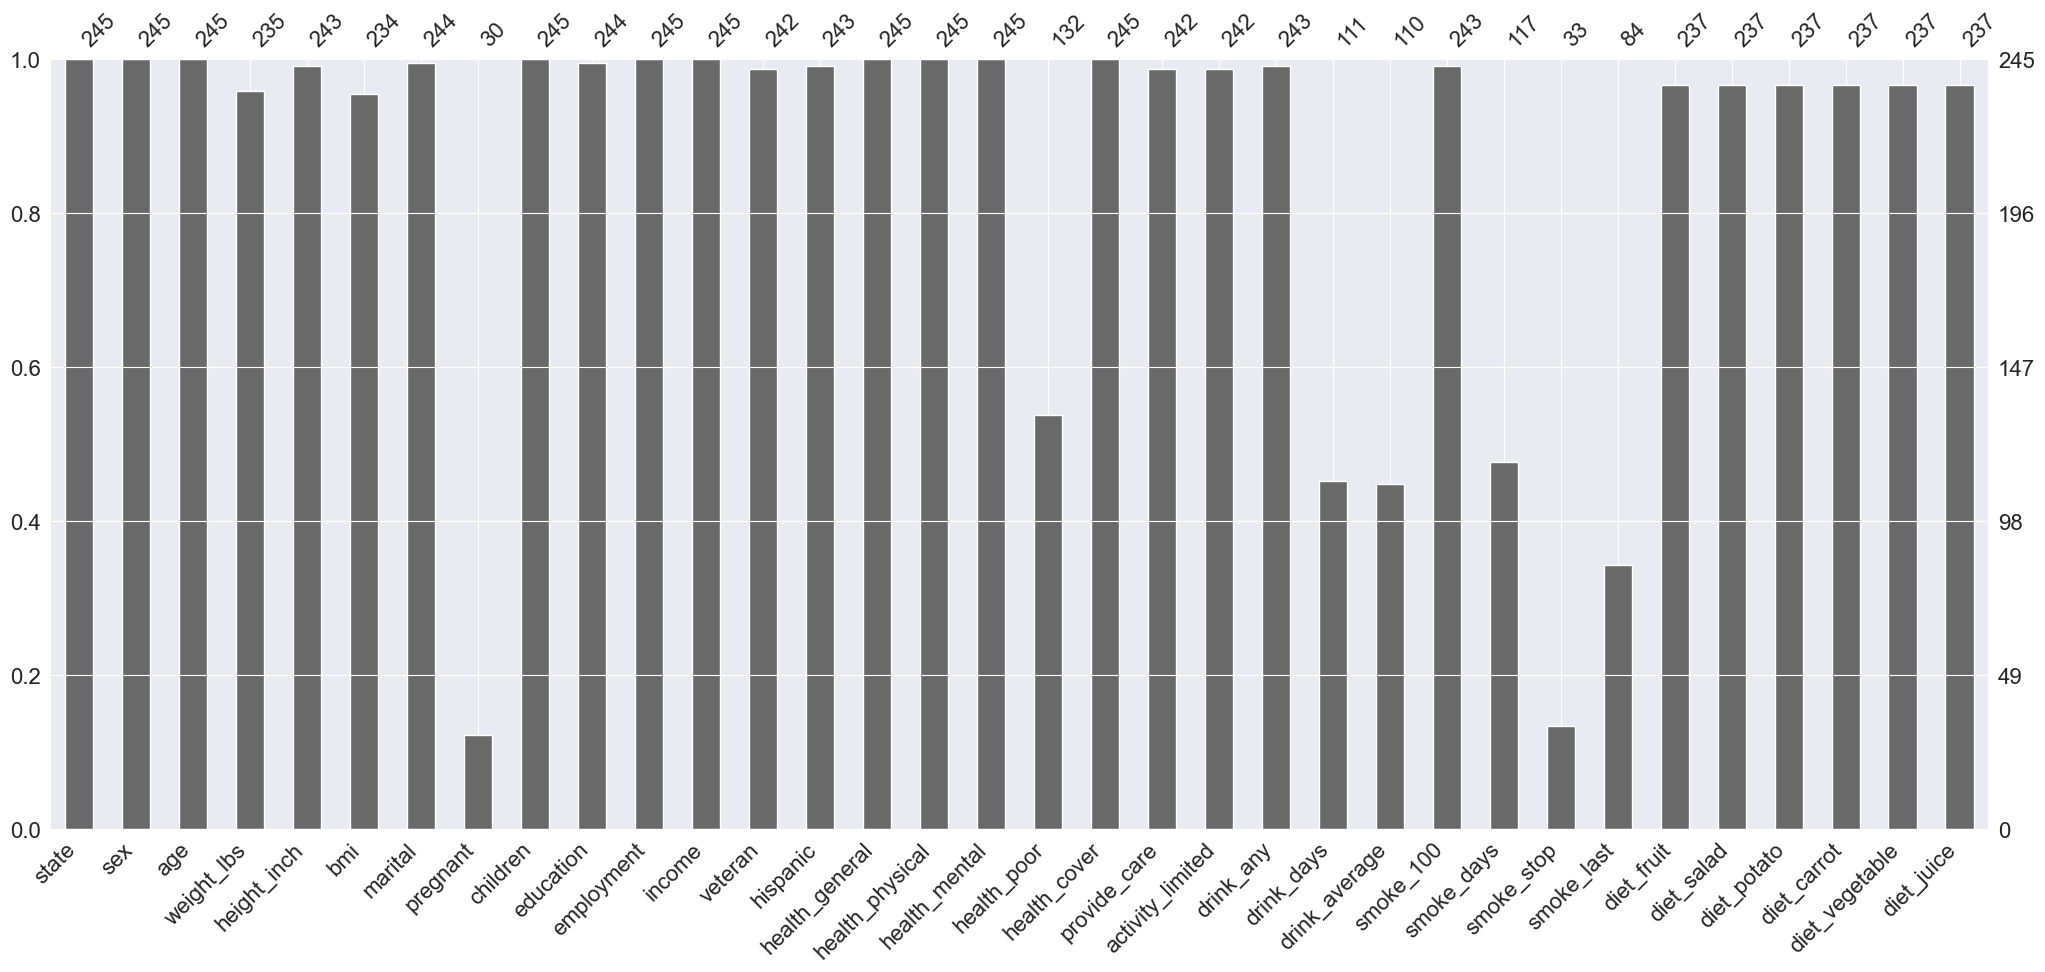

In [ ]:
missingno.bar(riskfactors_df)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

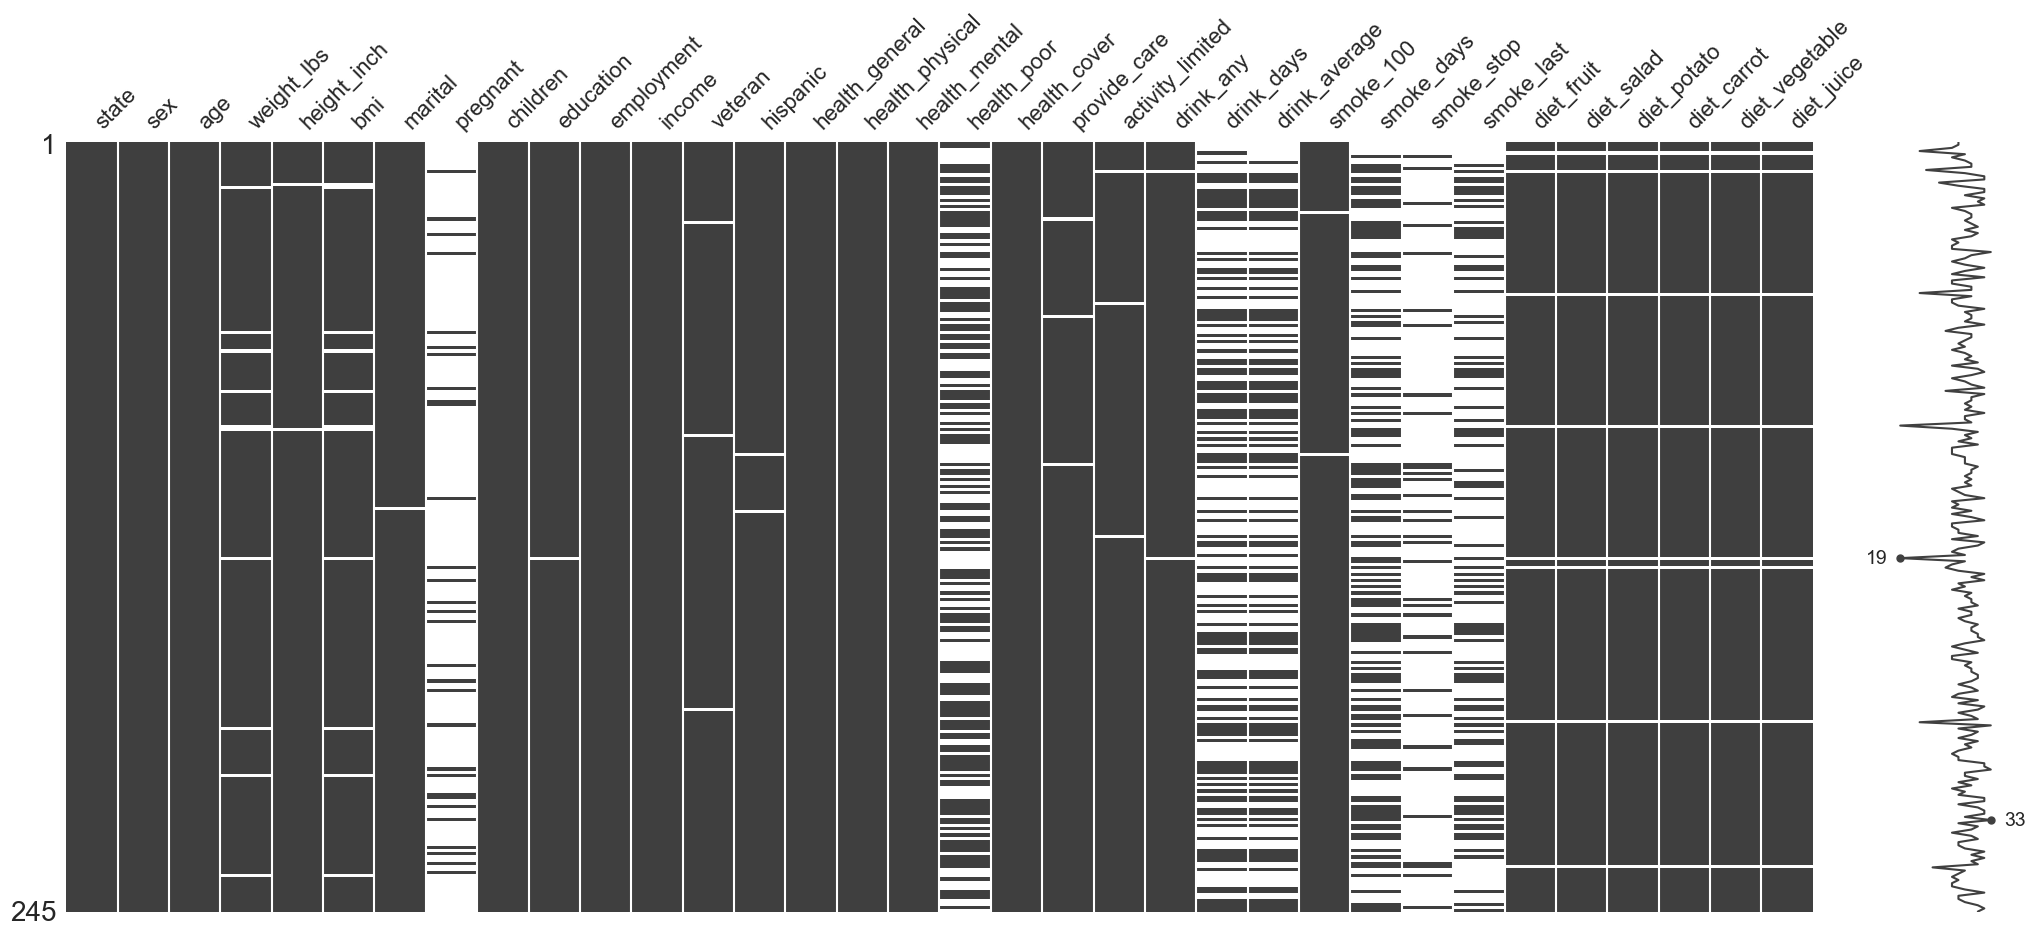

In [ ]:
missingno.matrix(riskfactors_df)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

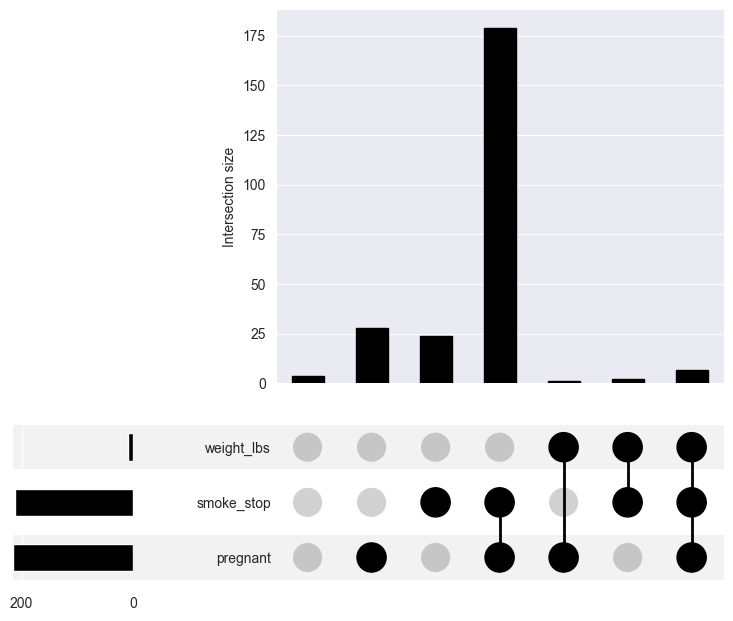

In [ ]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant', 'weight_lbs', 'smoke_stop'],
        element_size=60
    )
)

<AxesSubplot: >

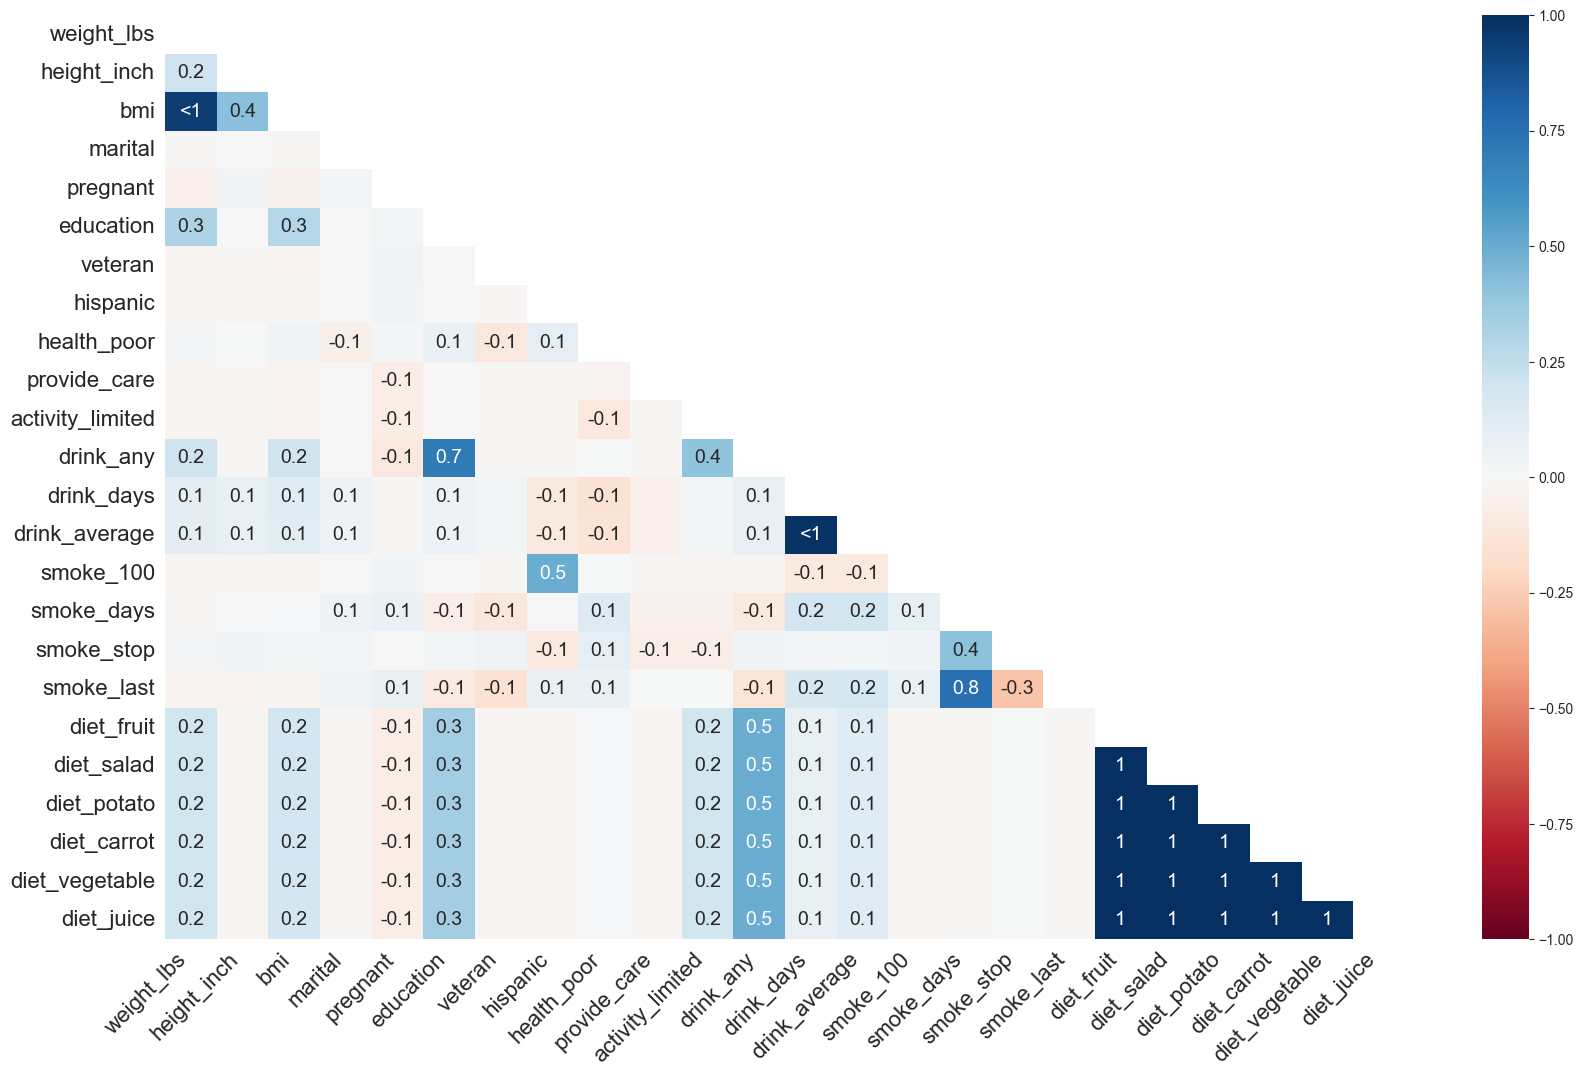

In [ ]:
missingno.heatmap(riskfactors_df)

# Codificacion de valores faltantes

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [ ]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)


#### Números

In [ ]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)


In [ ]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x=[1, 3, "NA", -99, -98, -99],
        y=["A", "N/A", "NA", "E", "F", "G"],
        z=[-100, -99, -98, -101, -1, -1]
    )
)

# convertir a csv
# missing_data_example_df.to_csv(
#     './data/missing_data_example.csv',
#     index=False,
# )

missing_data_example_df


,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [ ]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

## Susitucion de valores faltantes

### sustitucion desde la lectura de datos

In [ ]:
pd.read_csv(
    './data/missing_data_example.csv',
    na_filter=True,
    na_values=[-99, -1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


### Sustitucion global

In [ ]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, 'NA'],
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


### Sustitucion dirigida

In [ ]:
(
    missing_data_example_df
    .replace(
        to_replace={
            'x': {
                -99: np.nan,
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


# Conversion de valores faltantes implicitos a explicitos

In [35]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        'name' : ['lynn', 'lynn', 'lynn', 'zelda'],
        'time' : ['morning', 'afternoon', 'night', 'morning'],
        'value' : [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


## Estrategias para identificar valores faltantes implicitos

### Pivotar la tabla de datos

In [36]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index='name', # columnas que se mantienen
        names_from='time', # se convierten en columnas
        values_from='value'
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


### Cuantificar ocurrencias de n-tuplas

In [40]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name'],
    )
    .reset_index(name='n')
    .query('n < 3')
)

,name,n
1,zelda,1


## Exponer filas faltantes implicitas a explicitas

Janitor es una biblioteca de Python que proporciona funciones para limpiar datos. La biblioteca proporciona funciones para eliminar filas y columnas duplicadas, eliminar filas y columnas con valores faltantes, eliminar filas y columnas con valores atípicos, eliminar filas y columnas con valores extremo y eliminar filas y columnas con valores atípicos.

https://pyjanitor-devs.github.io/pyjanitor/

### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar las pares faltantes de name y time

In [43]:
(
    implicit_to_explicit_df
    # janitor
    .complete(
        'name', 
        'time'
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


### Limitar las exposicion de n-tuplas de valores faltantes

In [45]:
(
    implicit_to_explicit_df
    .complete(
        { 'name': ['lynn', 'zelda'], },
        { 'time': ['morning', 'afternoon'] },
        sort = True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


### Rellenar los valores faltantes

In [46]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value = np.nan
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


### Limitar el relleno de valores faltantes

In [47]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value=0,
        explicit=False
    )
)


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


# Tipos de valores faltantes

**Missing Completely at Random (MCAR)** __(Perdidos completamente al azar)__ -  se refiere a una situación en la que la probabilidad de que un valor de una variable falte en los datos no depende del valor real de la variable en sí, sino que está relacionada con otras variables en el conjunto de datos. En otras palabras, los datos que faltan están aleatorizados de alguna manera que es independiente del valor real de la variable que falta.

Por ejemplo, supongamos que se está realizando un estudio sobre la salud y se recopilan datos sobre el peso, la altura y el nivel de colesterol de los participantes. Si algunos participantes no proporcionan su nivel de colesterol, pero la probabilidad de que falte esa información no depende de su nivel de colesterol real, sino que está relacionada con otros factores, como su edad o su nivel de educación, entonces la falta de datos se consideraría "faltantes al azar" (MAR).

Es importante destacar que los datos que faltan pueden tener un impacto significativo en los resultados del análisis, y es importante tener en cuenta si los datos que faltan están al azar o si hay algún patrón o sesgo en los datos faltantes. Esto puede tener implicaciones importantes para la validez de las conclusiones del estudio. 

_definicion de platzi_: La localizacion de los valores falntantes en el conjunto de datos ocurre completamente al azar, estps no dependen de ningun otro dato.

**Missing at Random (MAR)** __(Perdidos al azar)__ - los datos faltantes se deben a factores que se pueden explicar a partir de los datos que ya se han observado. Esto significa que la probabilidad de que un valor falte no depende del valor en sí mismo, sino de otras variables dentro del conjunto de datos.

Por lo tanto, si los datos faltantes están MAR, se puede utilizar una variedad de técnicas estadísticas para analizar los datos y hacer inferencias precisas a partir de ellos. Sin embargo, es importante tener en cuenta que los datos MAR todavía pueden contener sesgos y pueden requerir la selección cuidadosa de técnicas de análisis de datos para minimizar estos sesgos.

_ejemplo_: Las herramientas necesitan mantenimiento periodico para asegurar su funcionamiento constante. En las fechas donde se le hace mantenimiento sabemos que ocurrira una falta de datos por lo que esos datos faltantes son localizados. La localizacion de los valores faltantes en el conjunto de datos depende de otros valores observados

**Missing Not at Random (MNAR)** __(Perdidos no al azar)__ - los datos faltantes no se deben a factores que se pueden explicar a partir de los datos que ya se han observado. Esto significa que la probabilidad de que un valor falte no depende del valor en sí mismo, sino de otras variables dentro del conjunto de datos.

Las herramientas tienen limites. Al tratar de hacer seguimientos fuera de su rango de medicion, se generan valores faltantes. La localizacion de los valores faltantes en el conjunto de datos dependen de los valores faltantes en si mismos

In [50]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
diabetes_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,pregnancies,0,768,0.0
1,glucose,0,768,0.0
2,blood_pressure,0,768,0.0
3,skin_thickness,0,768,0.0
4,insulin,0,768,0.0
5,bmi,0,768,0.0
6,diabetes_pedigree_function,0,768,0.0
7,age,0,768,0.0
8,outcome,0,768,0.0


In [52]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)

<AxesSubplot: >

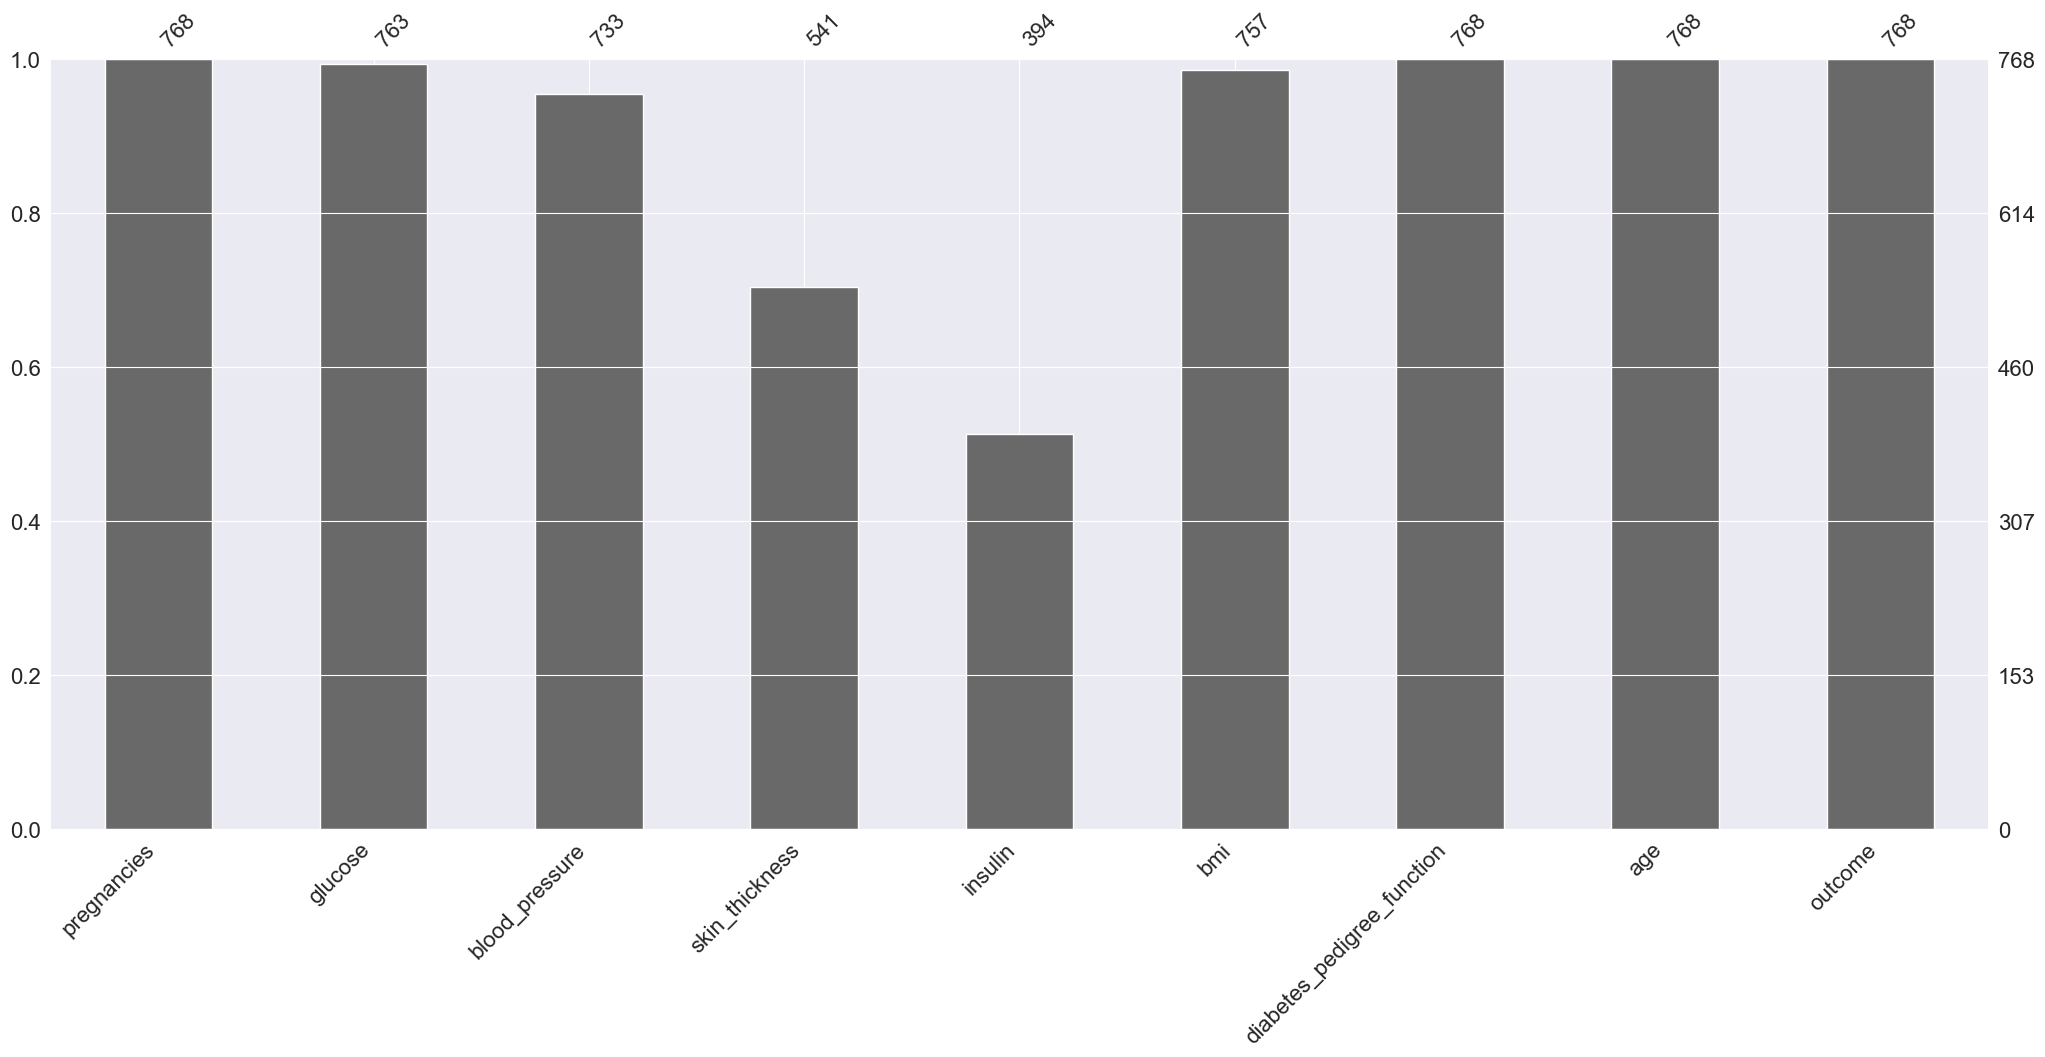

In [53]:
missingno.bar(diabetes_df)

## Missing Completely at Random (MCAR)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

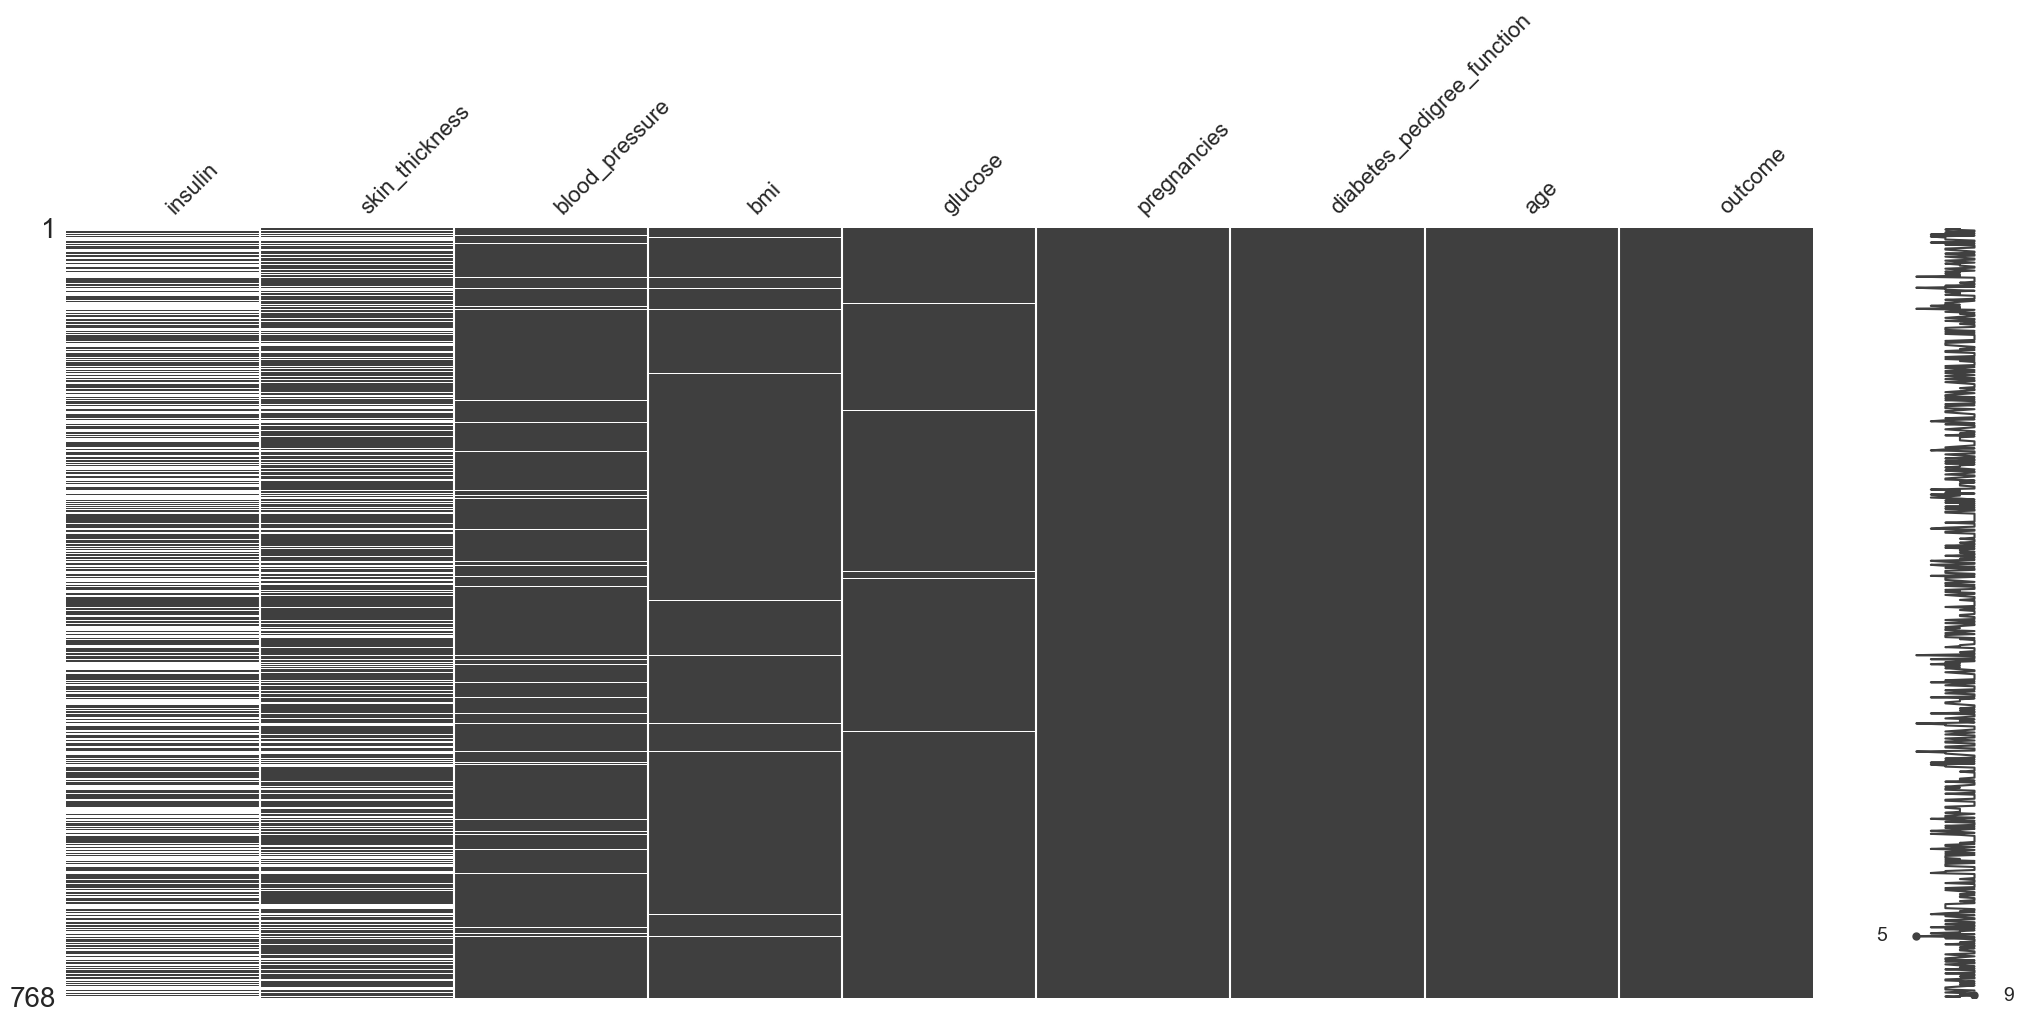

In [56]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(
        missingno.matrix,
    )
)

podemos decir que los datos faltantes de la variable "glucose" son MCAR

## Missing At Random (MAR)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

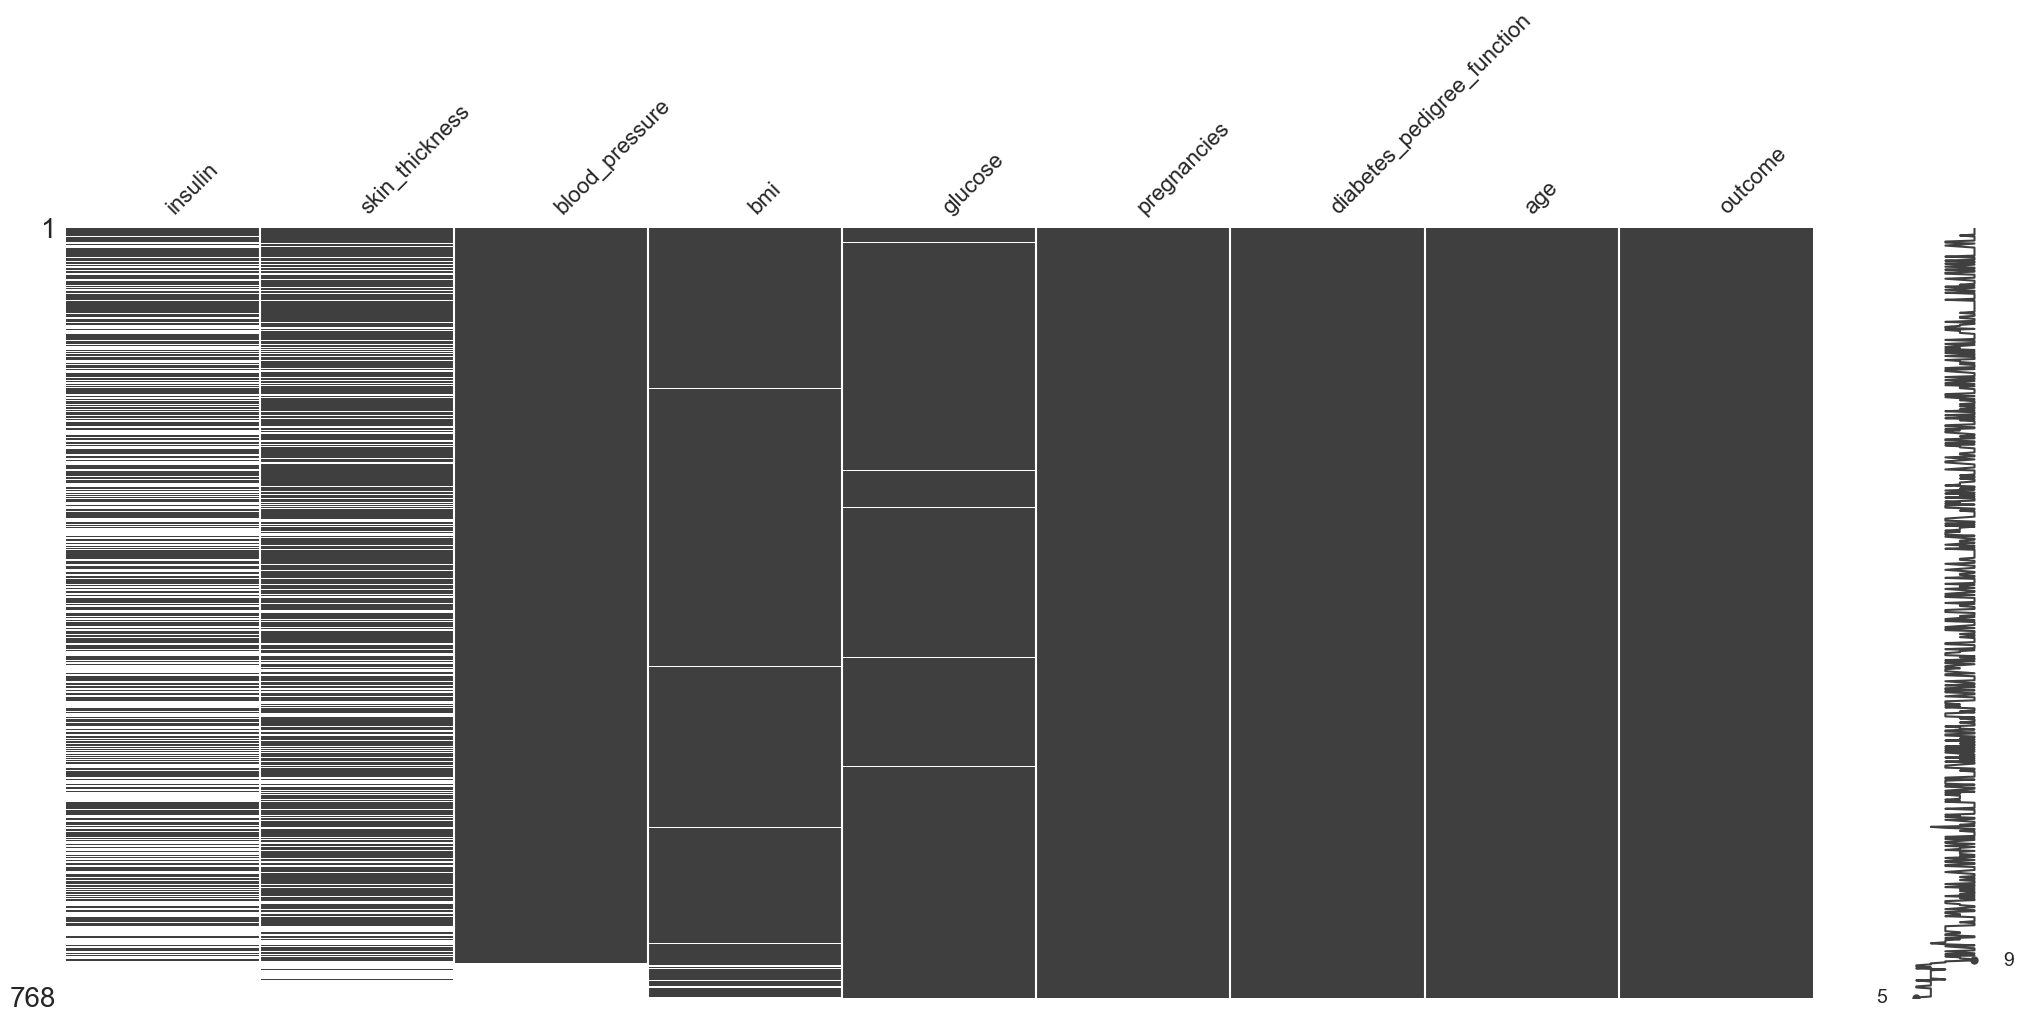

In [59]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='blood_pressure')
    .pipe(
        missingno.matrix,
    )
)

## Missing Not At Random (MNAR)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

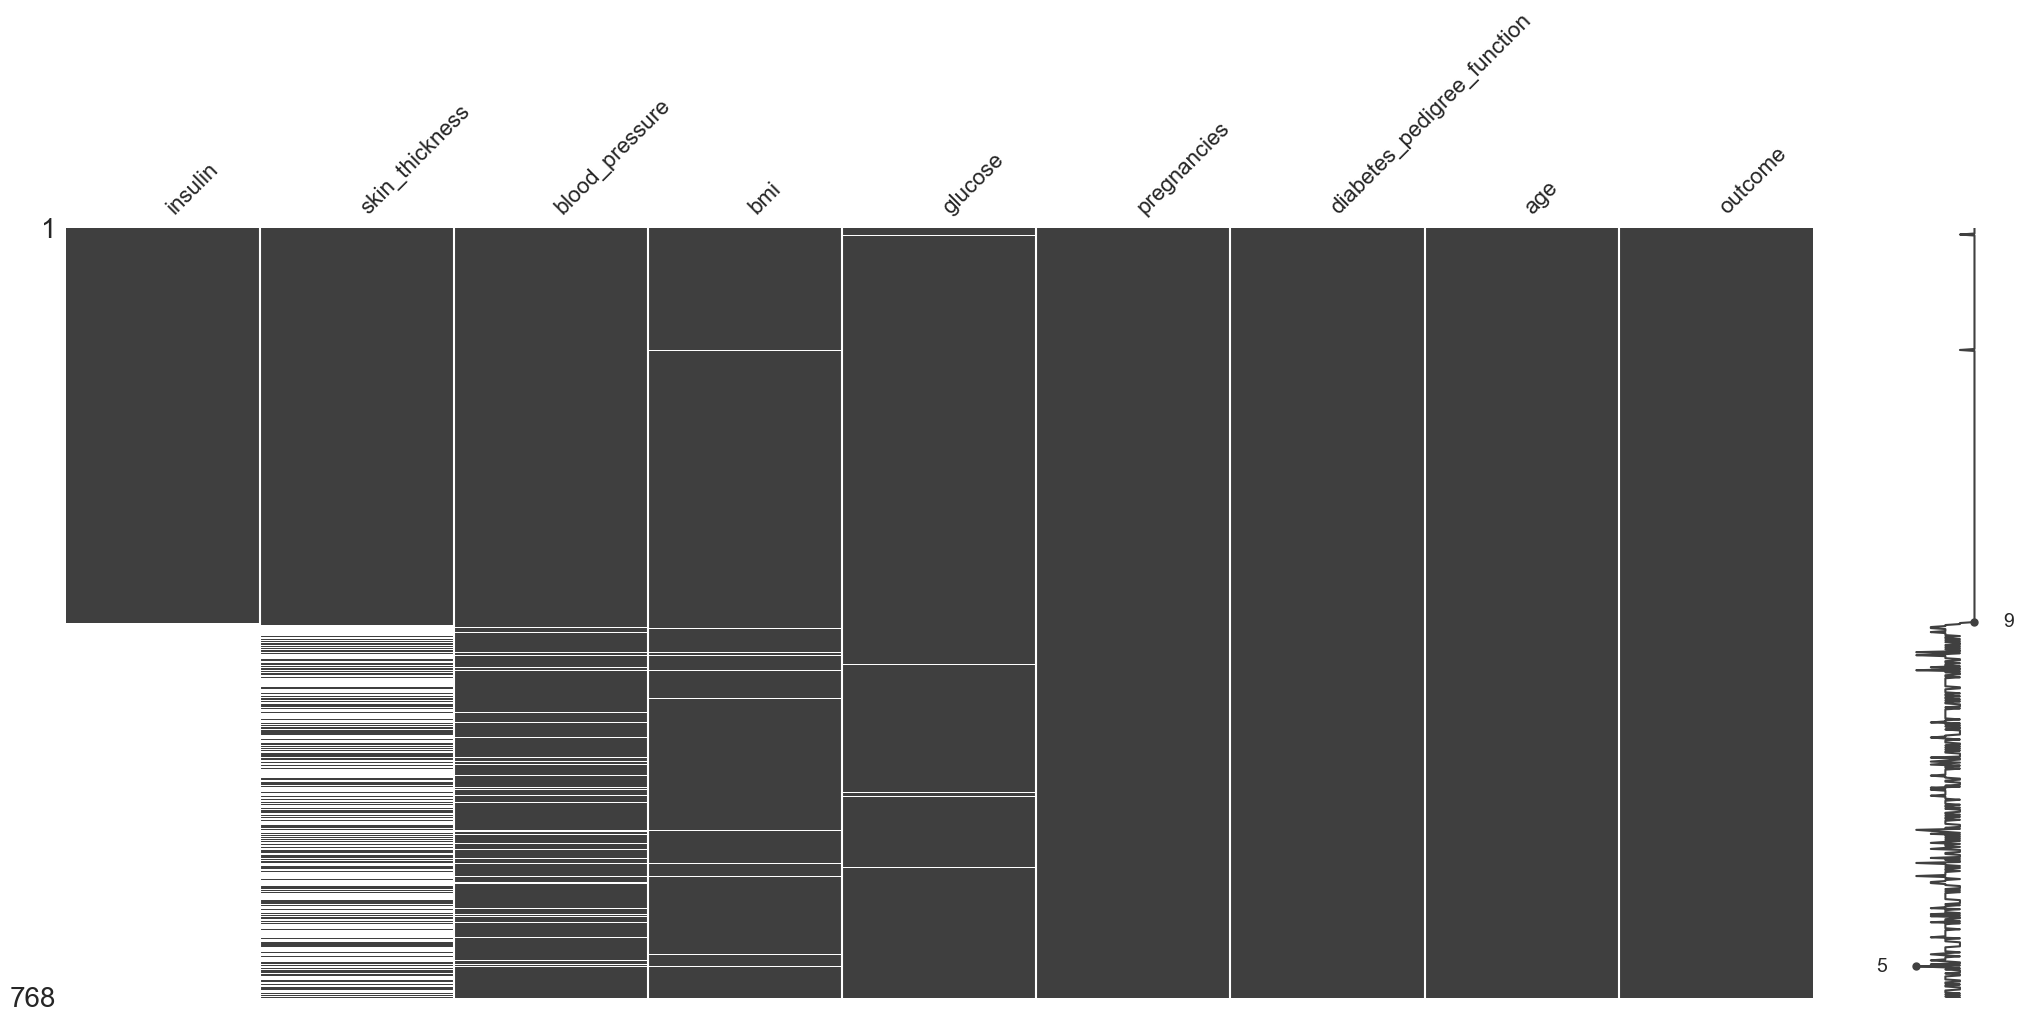

In [60]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='insulin')
    .pipe(
        missingno.matrix,
    )
)


# Concepto y aplicacion de la matriz de sombras (i.e, shadow matrix)

## Construccion de la matriz de sombras

In [66]:
(
    riskfactors_df
    .isna()
    .replace({
        True: 'Missing', 
        False: 'Not Missing'
    })
    .add_suffix('_NA')
    .pipe(
        lambda shadown_matrix: pd.concat(
            [riskfactors_df, shadown_matrix],
            axis=1, # las columnas se concatenan
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


## Utilizar funcion de utileria bind_shadow_matrix()

In [83]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


## Explorar estadisticos utilizando las nuevas columnas de la matriz de sombras

In [76]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


In [77]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .groupby(['pregnant_NA'])
    ['age']
    .describe()
    .reset_index()
)


,pregnant_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,215.0,61.590698,15.430577,9.0,52.0,62.0,71.5,97.0
1,Not Missing,30.0,33.133333,9.212934,7.0,29.5,34.0,40.0,44.0


# Vizualizacion de valores faltantes en una variable

<AxesSubplot: xlabel='weight_lbs_NA', ylabel='age'>

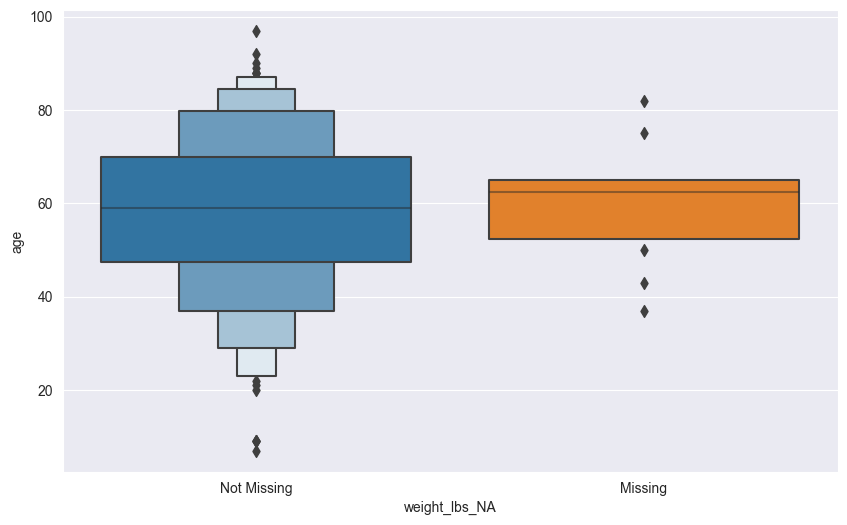

In [85]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x='weight_lbs_NA',
                y='age',
            )
        )
    )
)


<Figure size 1000x600 with 0 Axes>

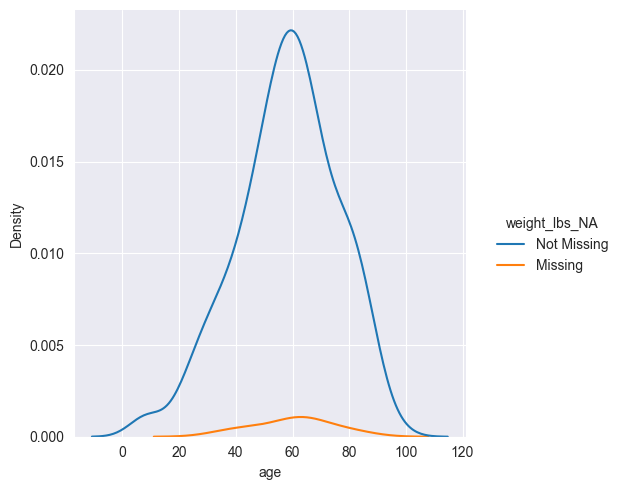

In [87]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                hue='weight_lbs_NA',
                kind='kde',
            )
        )
    )
)


<Figure size 1000x600 with 0 Axes>

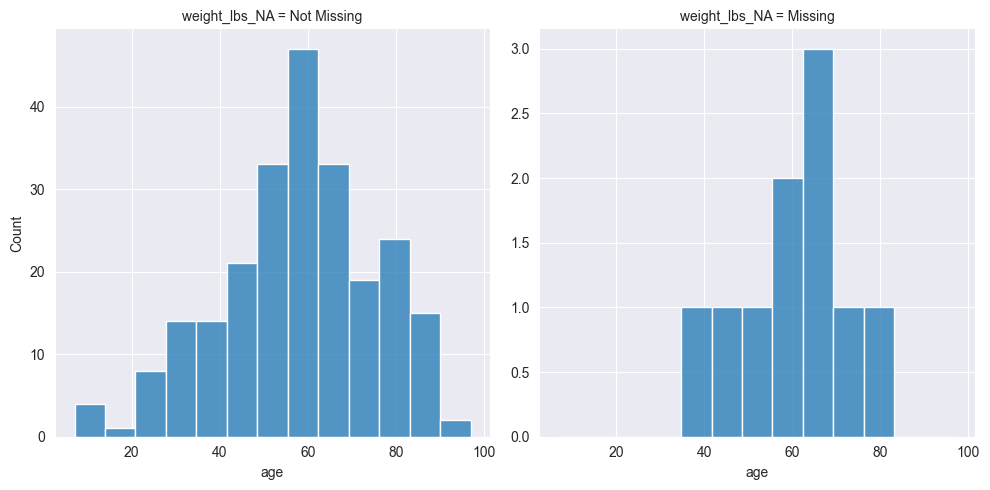

In [89]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col='weight_lbs_NA',
                facet_kws= {
                    'sharey': False,
                }
            )
        )
    )
)


<Figure size 1000x600 with 0 Axes>

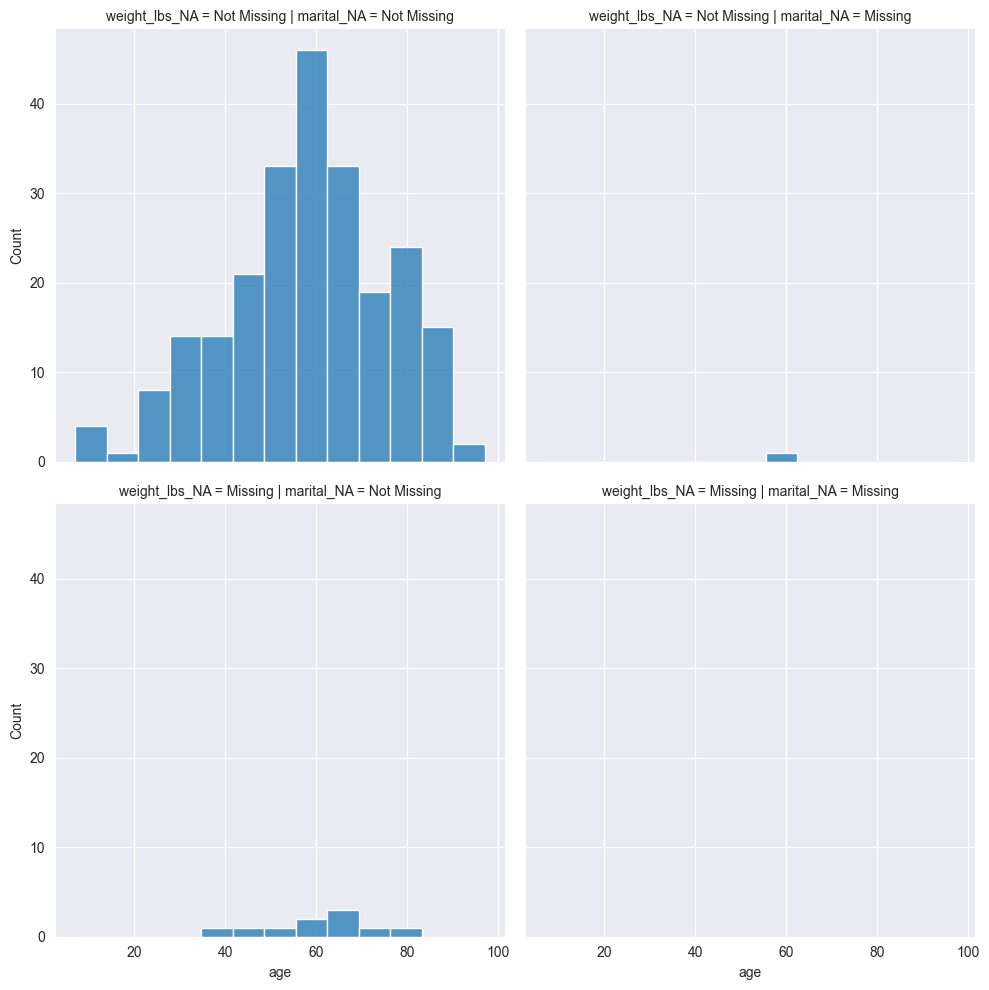

In [92]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col='marital_NA',
                row='weight_lbs_NA',
            )
        )
    )
)


# Vizualizacion de valores faltantes en dos variables

In [112]:
def column_fill_with_dummies(
        column: pd.Series,
        proportion_below: float = 0.10,
        jitter: float = 0.075,
        seed: int = 42
) -> pd.Series:

    column = column.copy(deep=True)

    # Extract values metadata.
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(
        number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter

    return column

<AxesSubplot: xlabel='weight_lbs', ylabel='height_inch'>

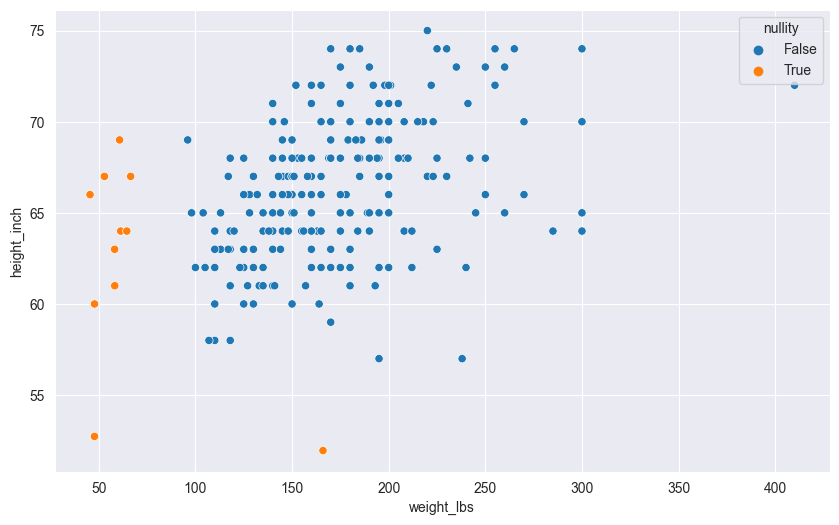

In [114]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .select_dtypes(
        exclude='category'  # excluye las variables categoricas
    )
    .pipe(
        # seleccionar solo columnas que tengan valores faltantes
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if '_NA' in column.name else column_fill_with_dummies(
            column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue='nullity'
            )
        )
    )
)


# Correlacion de nulidad

<AxesSubplot: >

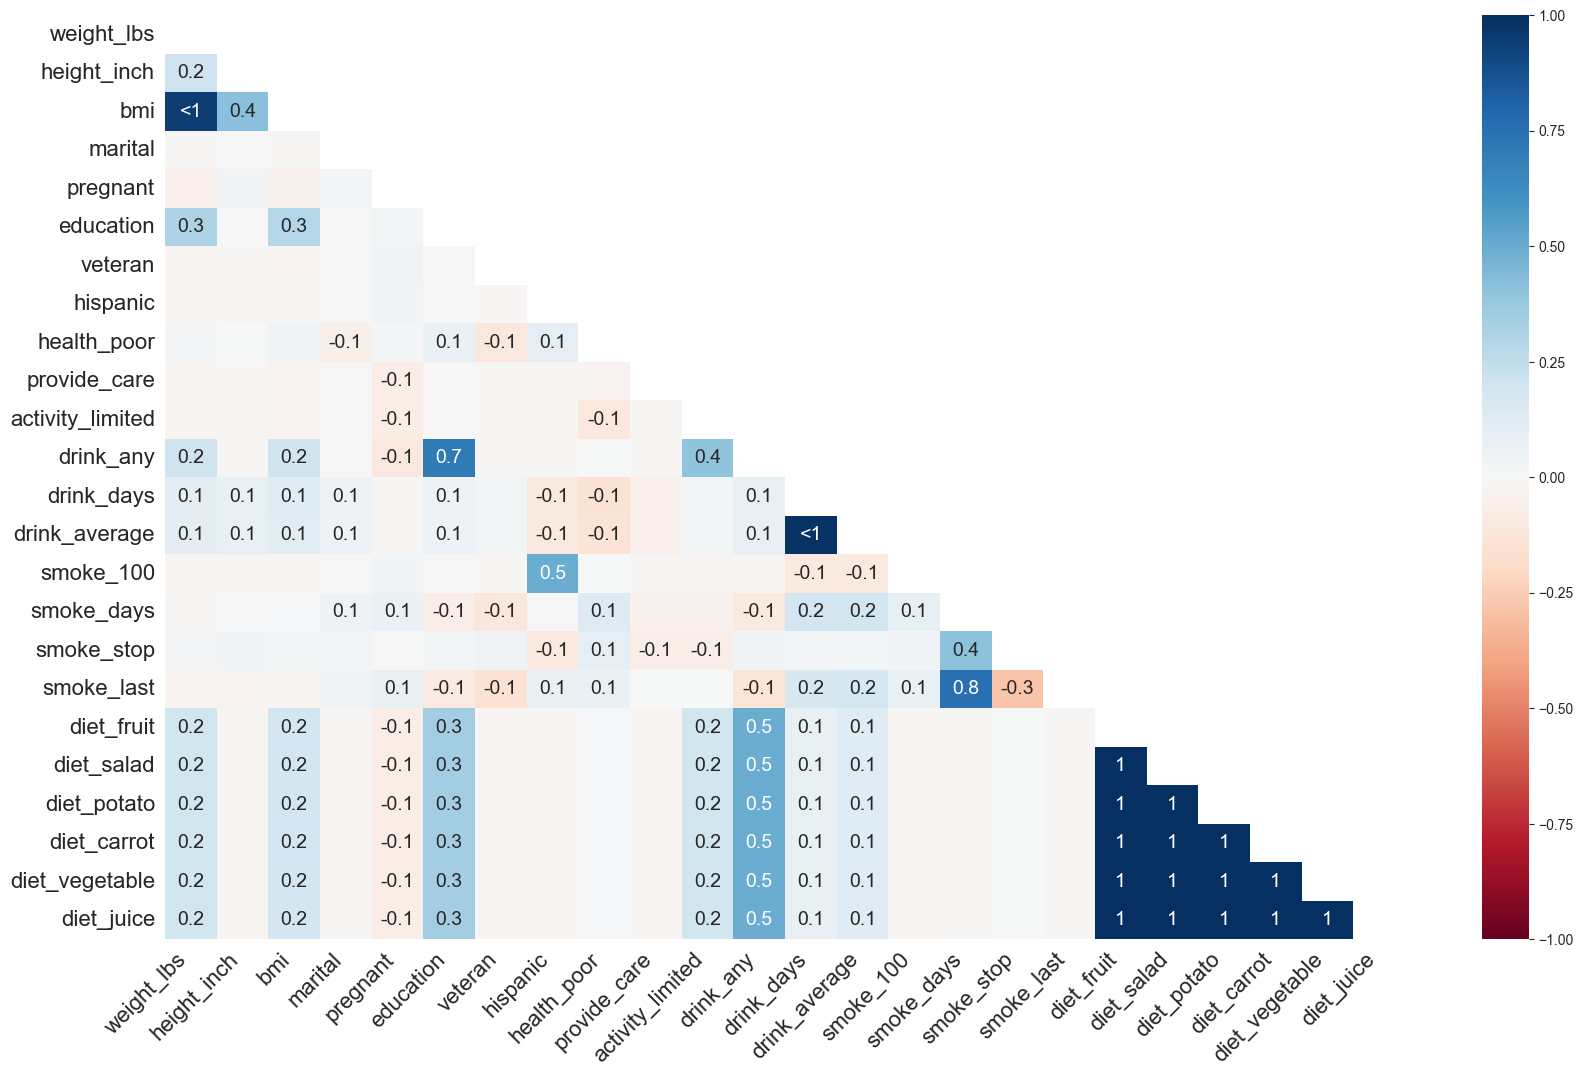

In [115]:
missingno.heatmap(
    df=riskfactors_df
)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:475: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)


<AxesSubplot: >

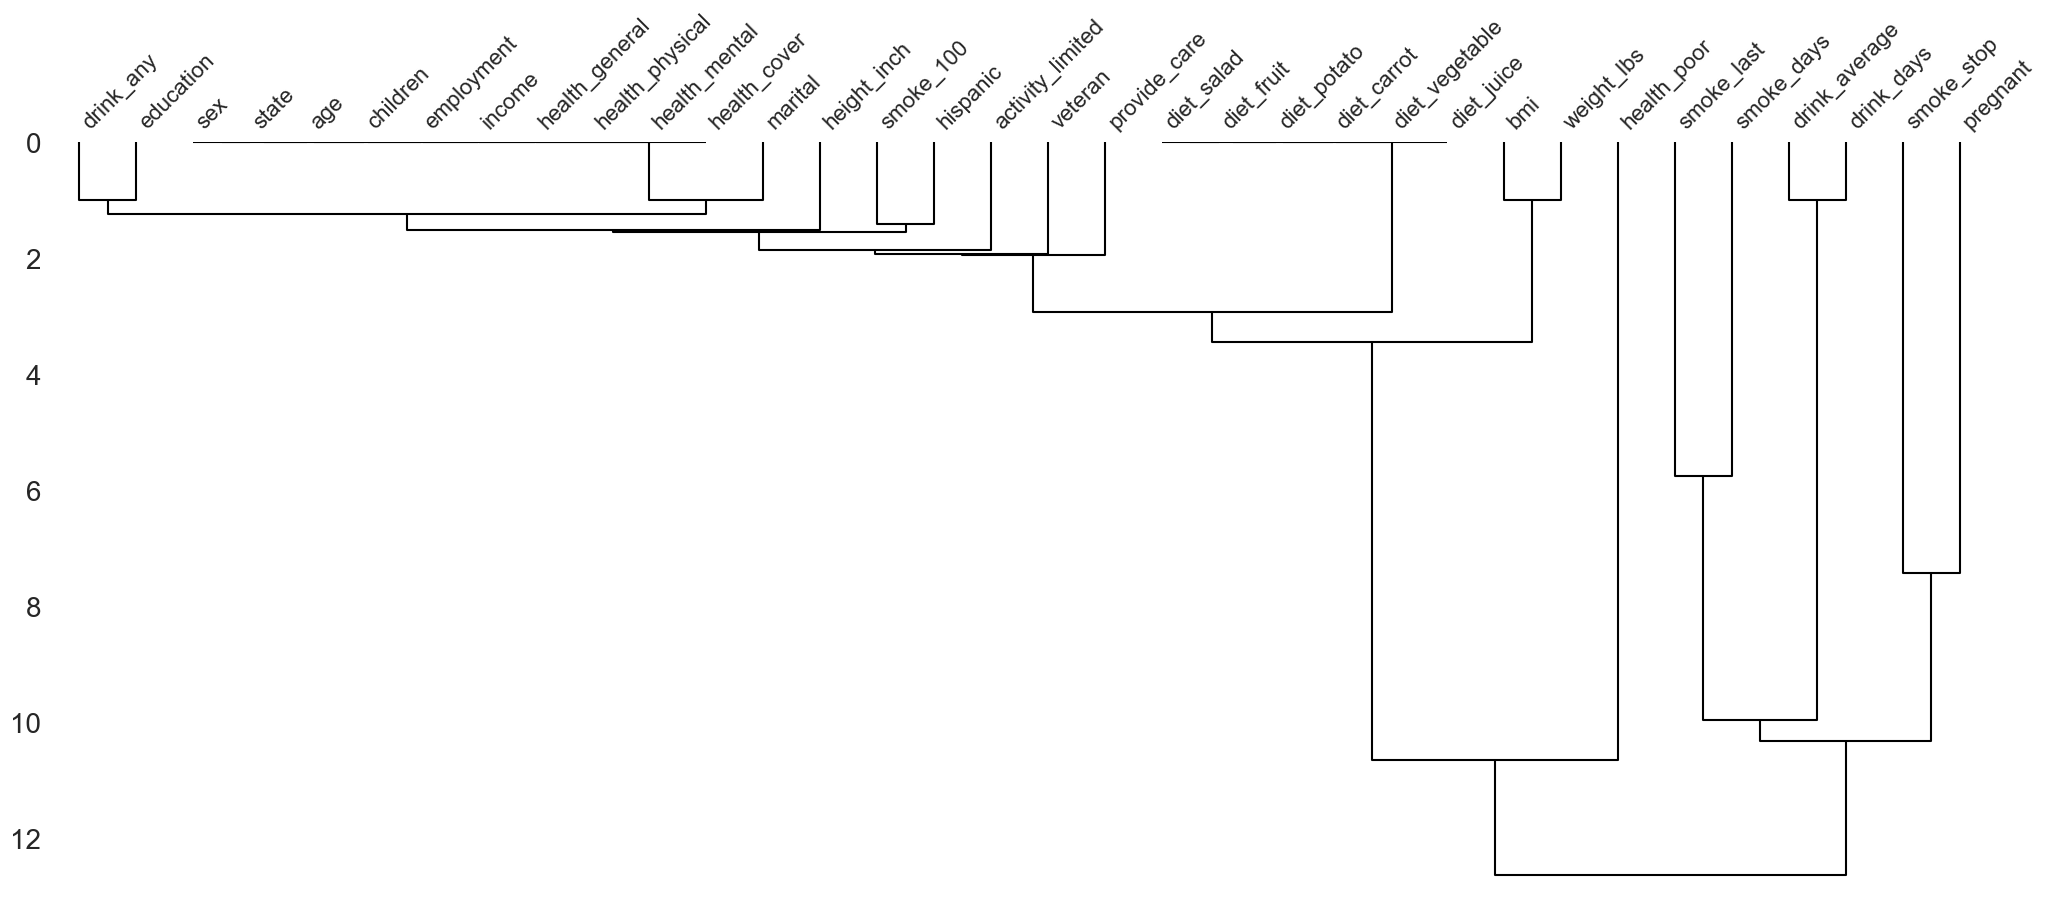

In [116]:
missingno.dendrogram(
    df=riskfactors_df
)

# Eliminacion de valores faltantes

La eliminacion de valores faltantes **asume** que los datos faltantes son MCAR. En cualquier otro caso, la eliminacion de valores faltantes puede sesgar los resultados del analisis.

In [118]:
riskfactors_df.shape

(245, 34)

## Pairwise deletion (eliminacion por pares)

In [121]:
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

In [123]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

In [124]:
riskfactors_df.mean(skipna=False)

C:\Users\erik1\AppData\Local\Temp\ipykernel_12936\2266639386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  riskfactors_df.mean(skipna=False)


age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children            0.424490
health_physical     4.118367
health_mental       3.142857
health_poor              NaN
drink_days               NaN
drink_average            NaN
diet_fruit               NaN
diet_salad               NaN
diet_potato              NaN
diet_carrot              NaN
diet_vegetable           NaN
diet_juice               NaN
dtype: float64

## Listwise Deletion or Complete Case (Eliminacion por lista o caso completo)

### Con base en 1 columna

In [125]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs'],
        how='any'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


### Con base en 2 columnas o mas

In [126]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [127]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='all' # solo borra las filas que tengan todos los valores faltantes
    )
)


,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


## Representacion grafica tras la eliminacion de valores faltantes

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

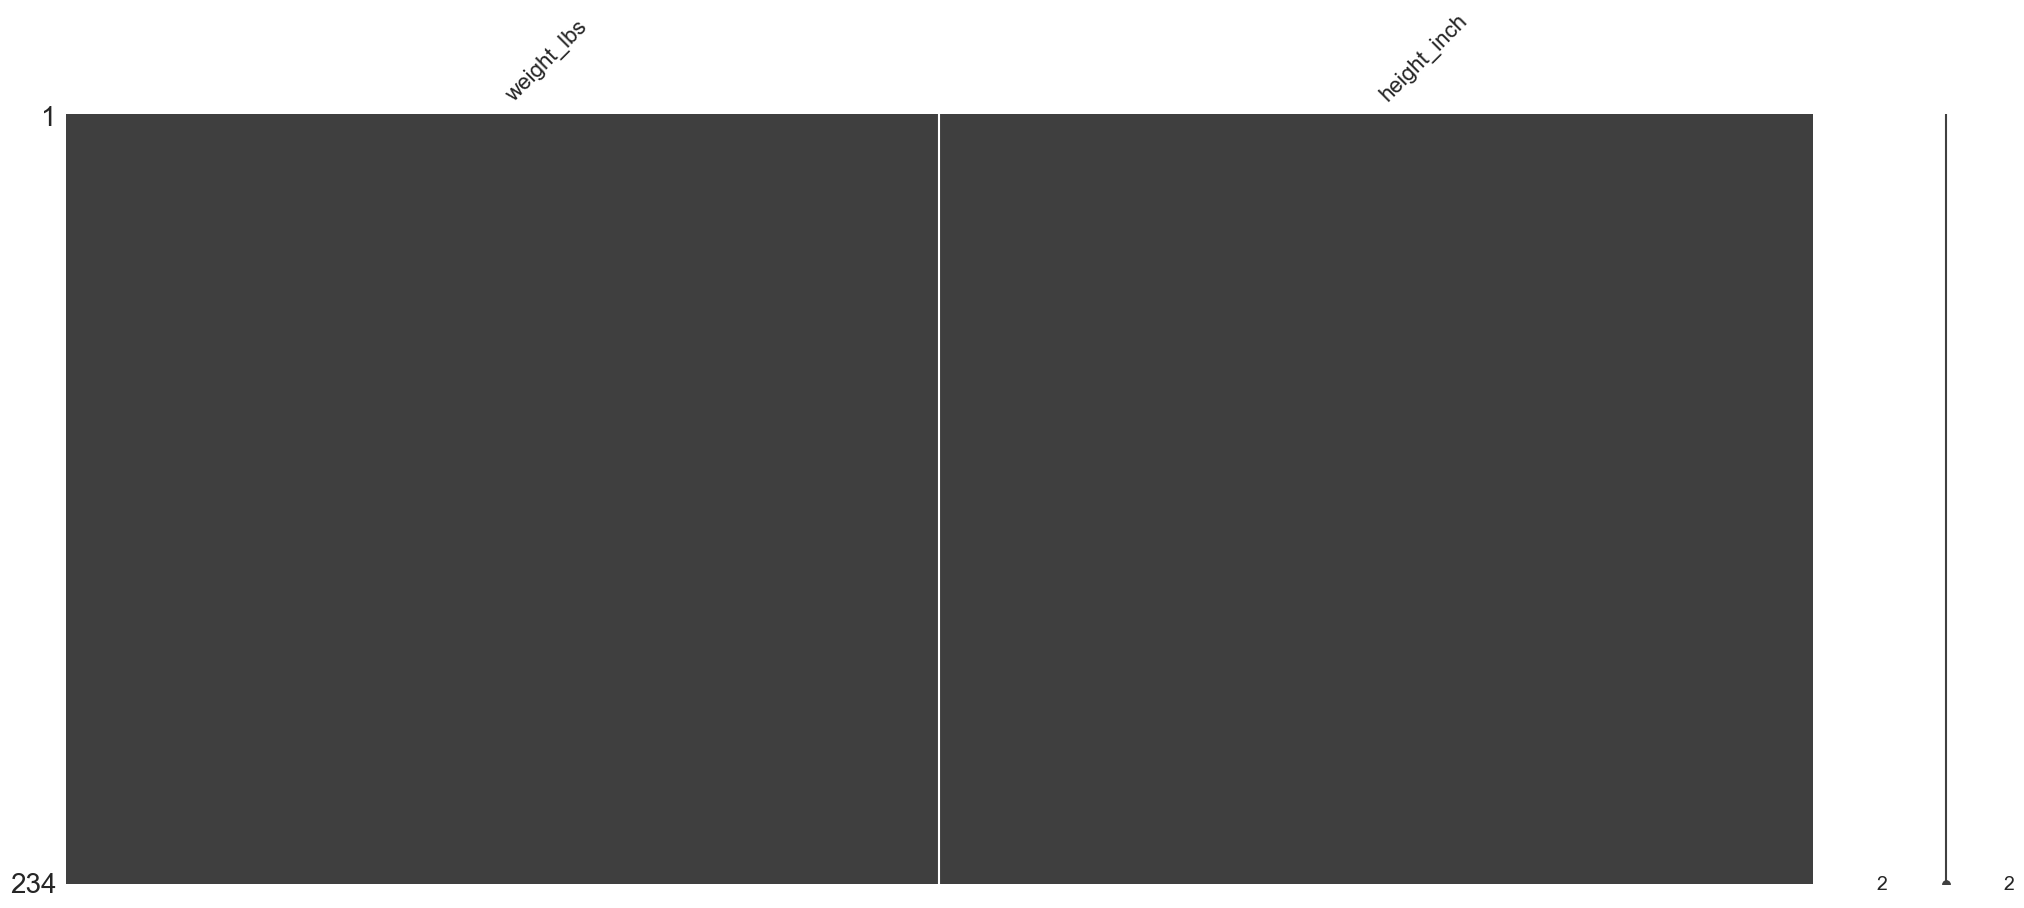

In [129]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any',
    )
    .select_columns( # janitor
        ['weight_lbs', 'height_inch']
    )
    .pipe(
        missingno.matrix,
    )
)


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

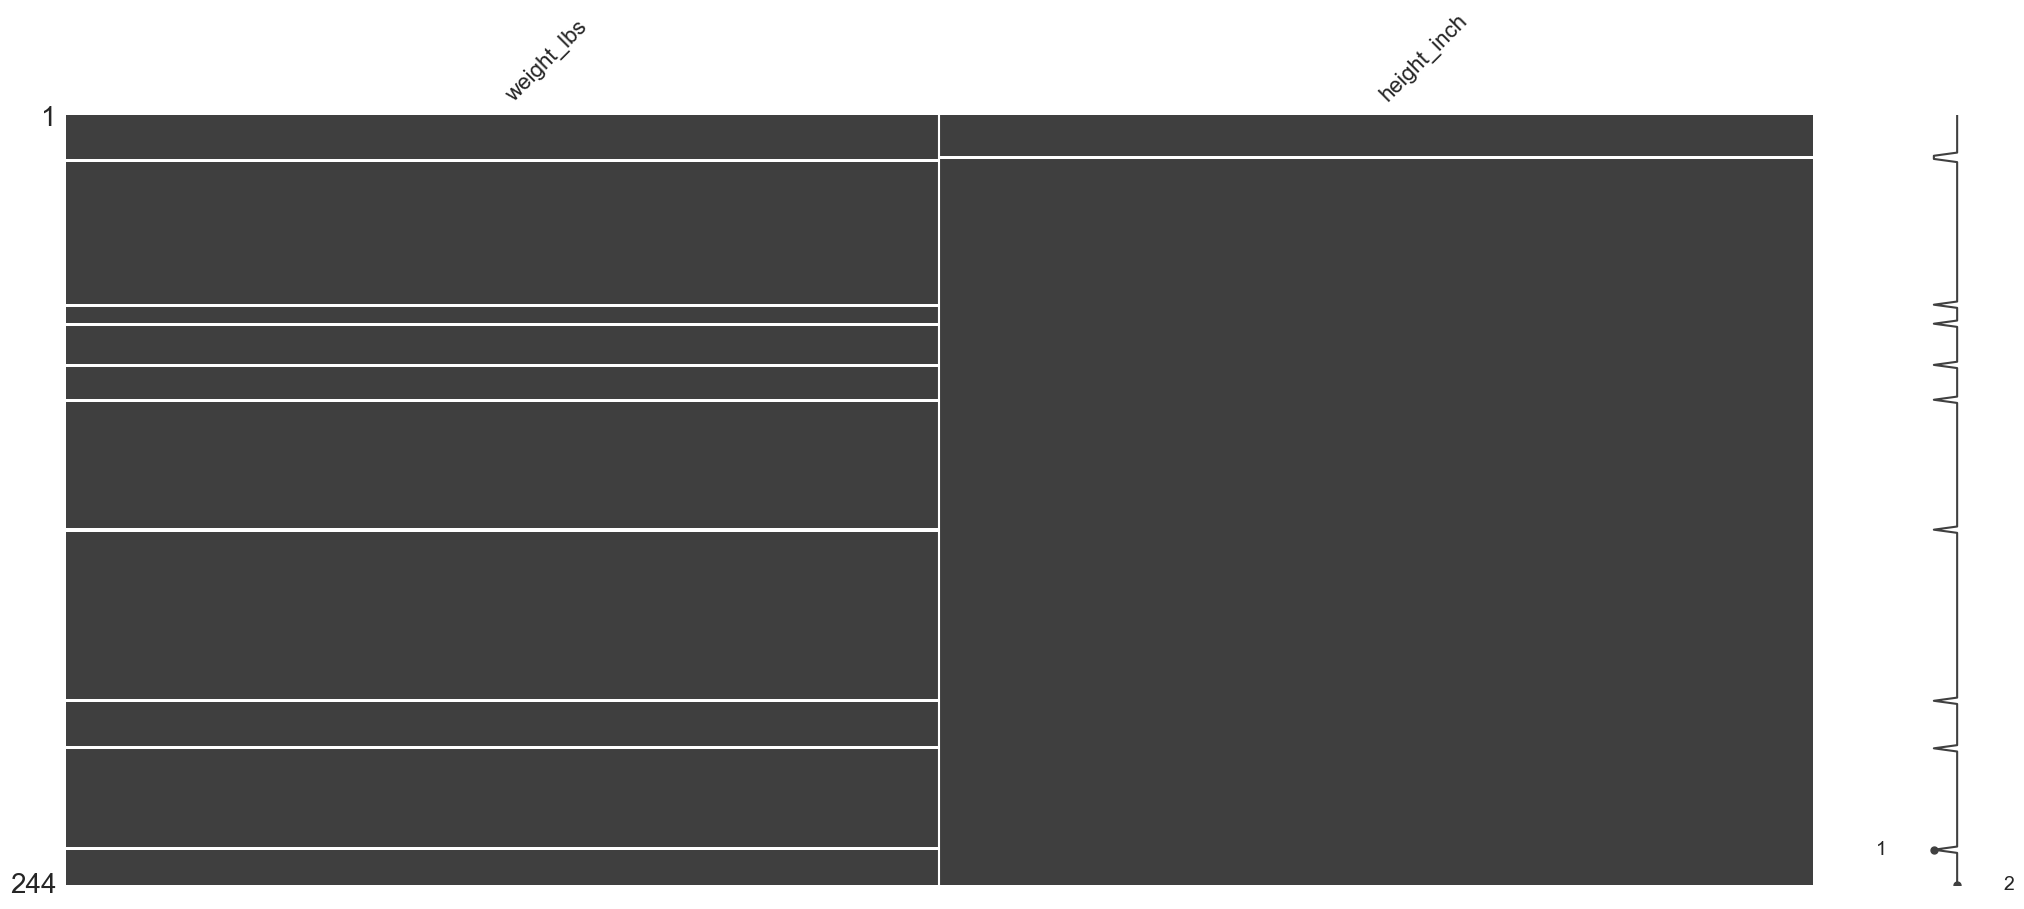

In [130]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='all',
    )
    .select_columns(  # janitor
        ['weight_lbs', 'height_inch']
    )
    .pipe(
        missingno.matrix,
    )
)


# Imputacion Basica de Valores Faltantes

## imputacion con base en el contexto

In [131]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [132]:
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


## Imputacion de un unico valor

<Figure size 1000x600 with 0 Axes>

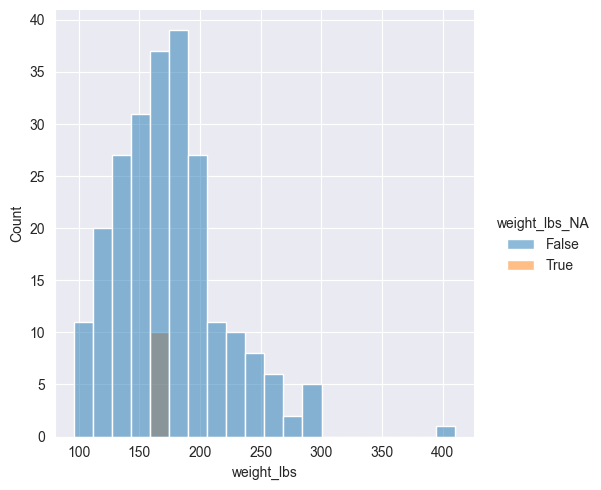

In [140]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis= 'rows',
        func= lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='weight_lbs',
                hue='weight_lbs_NA',
            )
        )
    )
)

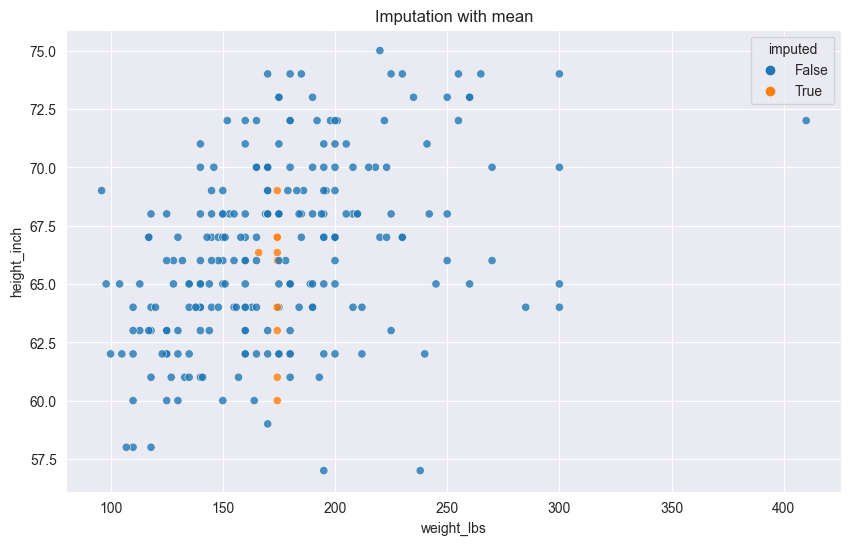

In [148]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis='rows',
        func=lambda column: column.fillna(
            column.mean()) if '_NA' not in column.name else column
    )
    .assign(
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue='imputed',
                alpha=.8
            )
        )
    )

)

plt.title('Imputation with mean')
plt.show()

<Figure size 1000x600 with 0 Axes>

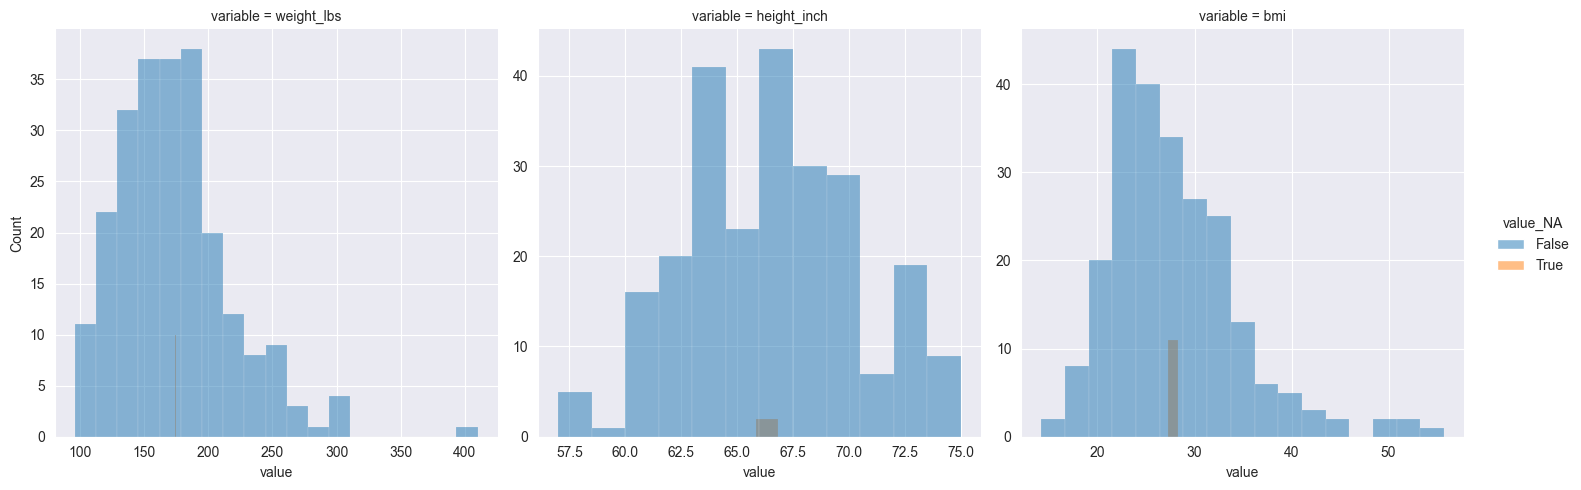

In [156]:
plt.figure(figsize=(10, 6))

(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis='rows',
        func=lambda column: column.fillna(
            column.mean()) if '_NA' not in column.name else column
    )
    .pivot_longer( # janitor
        index='*_NA',
    )
    .pivot_longer(
        index=['variable', 'value'],
        names_to='variable_NA',
        values_to='value_NA'
    )
    .assign(
        valid=lambda df: df.apply(axis='columns', func=lambda column: column.variable in column.variable_NA)
    )
    .query('valid')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='value',
                hue='value_NA',
                col='variable',
                common_bins=False,
                facet_kws=dict(sharex=False, sharey=False)
            )
        )
    )
)
